In [9]:
import pandas
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import time
import joblib
import plotly.express as px

In [10]:

def custom_color(dataframe, graph_a=[]):
    cols= dataframe.columns.tolist()
    colors= []
    for col in cols:
        if col in graph_a:
            colors.append('yellow')
        elif 'MLN_' in col:
            colors.append('green')
        elif 'STAT_' in col:
            colors.append('blue')
        else:
            colors.append('dodgerblue')
    return [colors, cols]


In [11]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [12]:
def plot_features_importance_as_barh(data, getColor, modelDictName,plotTitle, graph_a=[]):
    for index in data.index.values.tolist():
        timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
        ok = data.drop([
                'f1-score',
                'recall',
                'precision',
                'accuracy'
                ], axis=1
            )
        ok = ok.sort_values(
                by = index,
                axis = 1, 
                ascending = True
            )
        #colo = getColor(ok, graph_a)
        ok.loc[index].plot.barh(
                figsize=(10, 20), 
                color=getColor(ok, graph_a)[0]
            )
        #colo1 = getColor(ok, graph_a)
        #print(colo == colo1)
        plt.title(f"{plotTitle}")
        plt.axvline(x=0, color=".5")
        label = f"""
        {modelDictName[index]}
        ACCURACY: {data.loc[index,'accuracy']}, PRECISION: {data.loc[index,'precision']},
        RECALL: {data.loc[index,'recall']}, F1-SCORE: {data.loc[index,'f1-score']}
        """
        plt.xlabel(label)
        plt.subplots_adjust(left=0.3)
        filename1 = './plots/2_scale_matter_'+('_'.join(plotTitle.split(' ')))+index+'_'+timestr+'.png'
        #shap.plots.bar(shap_values,show=False)
        plt.savefig(filename1,dpi=700) #.png,.pdf will also support here
        plt.show()

In [13]:
graph_a = [
        'ARTISAN', 'ARTISTE', 'AVOCAT', 'CADRESSECTEURPRIVE', 'COMMERCANT',
        'CONTRACTUELS', 'DECISIONNAIRE', 'DIPLOMATE', 'EMPLOYEAGRICOLE',
        'EMPLOYESECTEURPRIMAIRE', 'EMPLOYESSECTEURPRIVE', 'ETUDIANT',
        'EXPERTCOMPTABLE', 'FONCTIONNAIRE', 'FONCTIONNAIREDELASECURITE',
        'FONCTIONNAIRESDELADEFENSE', 'FORESTIER', 'HUISSIER', 'INFIRMIER',
        'INGENIEUR', 'MEDECIN', 'MENAGERE', 'NOTAIRE', 'PHARMACIEN',
        'PROFESSEUR', 'RELIGIEUX', 'SANSPROFESSION',
        'TRAVAILLEURPOURSONCOMPTE','CCTCAMPAGNE', 'CCTCAMPAGNEAUXPARTICULIERS', 'CCTCONSOMMATION',
        'CCTEQUIPEMENT', 'CCTMARCHESPUBLICS', 'CCTNONVENTILABLE',
        'CCTPRETSCOLAIRE', 'CCTTRESORERIE', 'CLTCONSOMMATION',
        'CMTCONSOMMATION', 'CMTCREDITHABITAT', 'CMTCREDITINVESTIMMOBILIER',
        'CMTEQUIPEMENT', 'CMTNONVENTILABLE', 'Madame', 'Mademoiselle', 'Monsieur', 'MonsieurouMadame','Celibataire', 'Divorce(e)', 'Marie(e)', 'Separe(e)', 'Veuf/Veuve']
modelD = {
        'sv' :'SVM',
        'xgb':'XGBOOST',
        'dtc':'DECISION TREE',
        'lrc':'LOGISTIC REGRESSION',
        'rfc':'RANDOM FOREST',
        #'knn':knc
    }

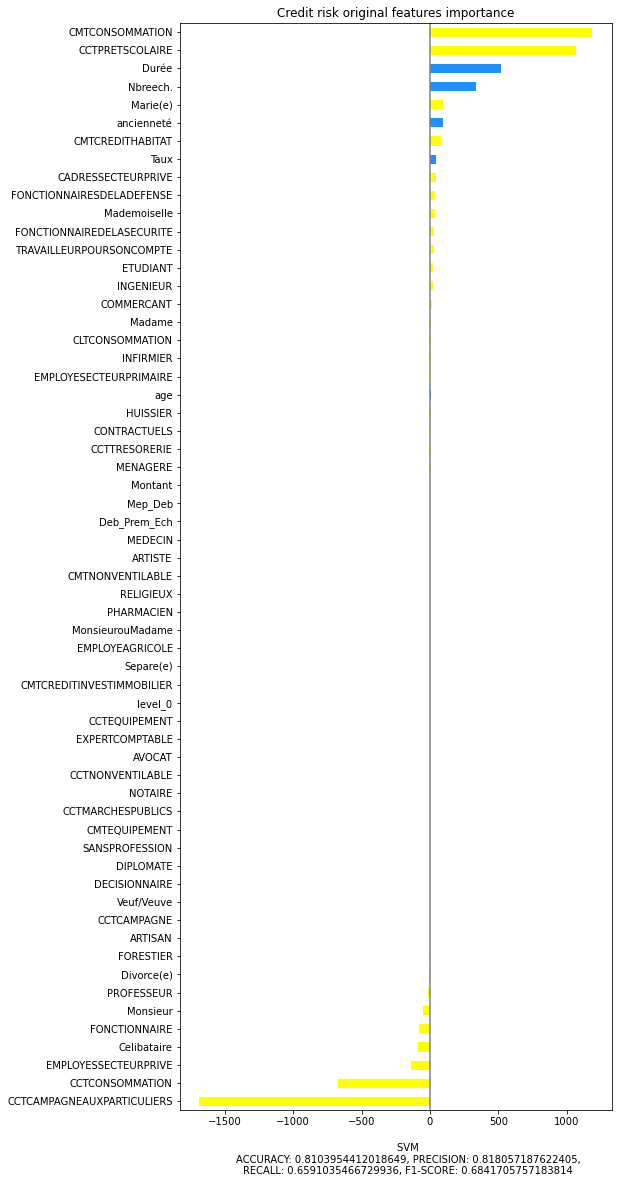

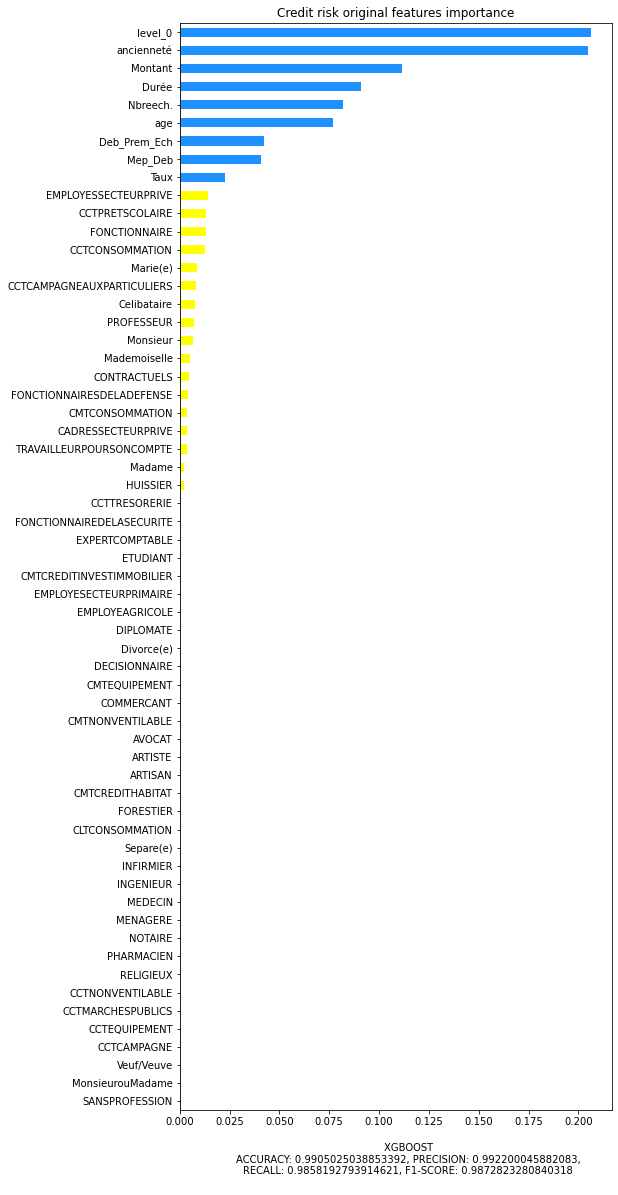

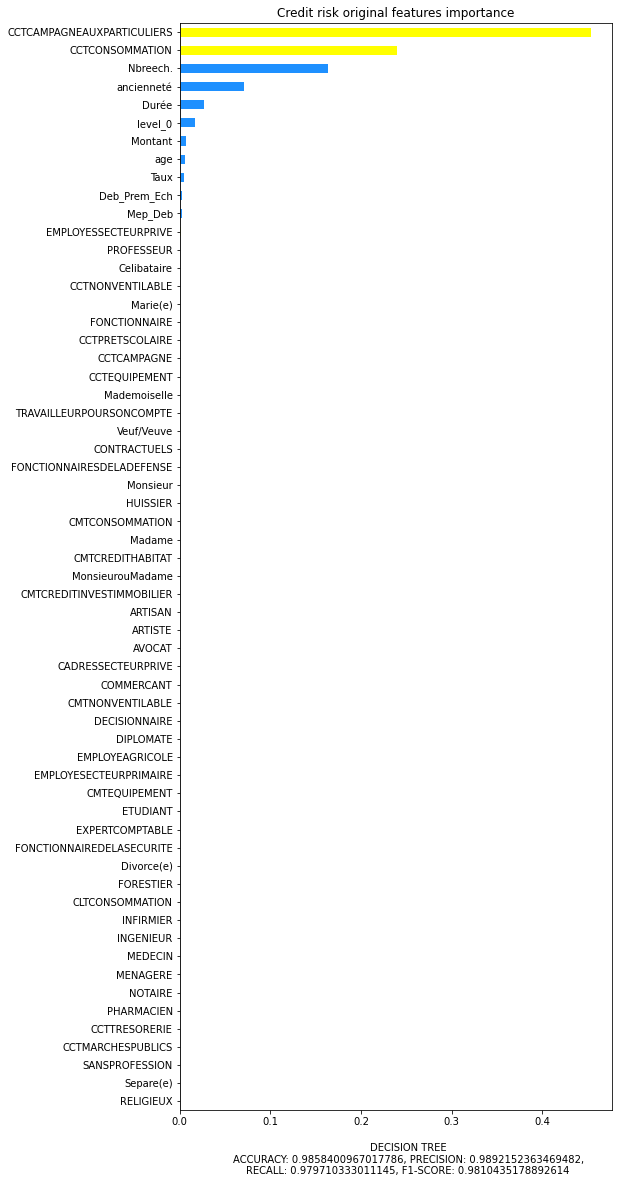

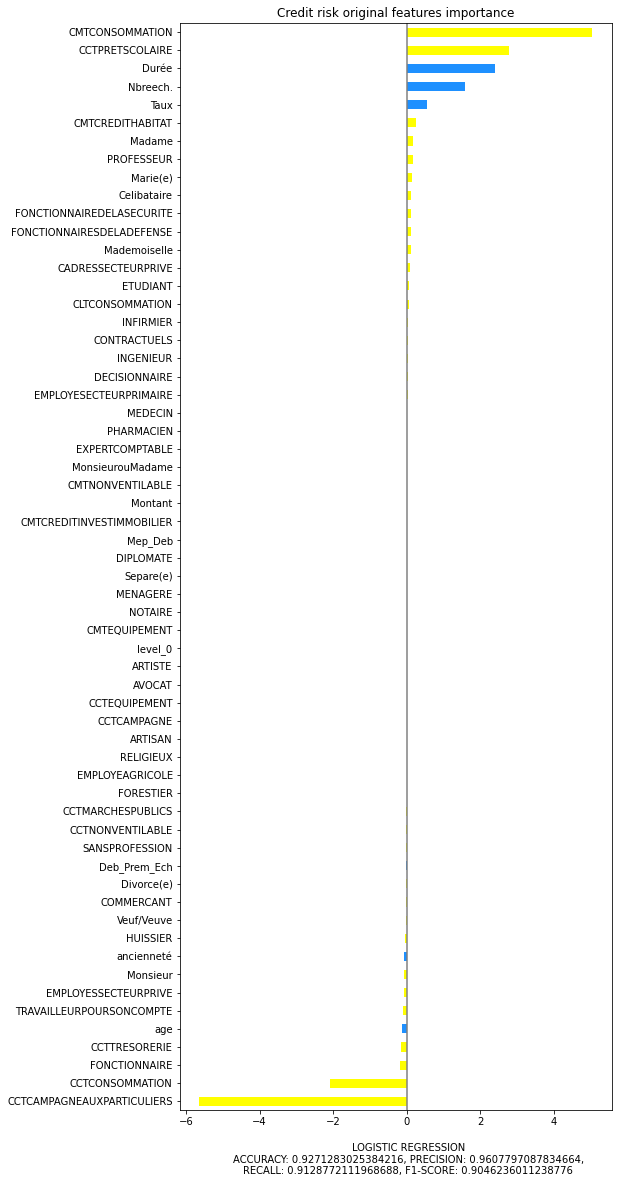

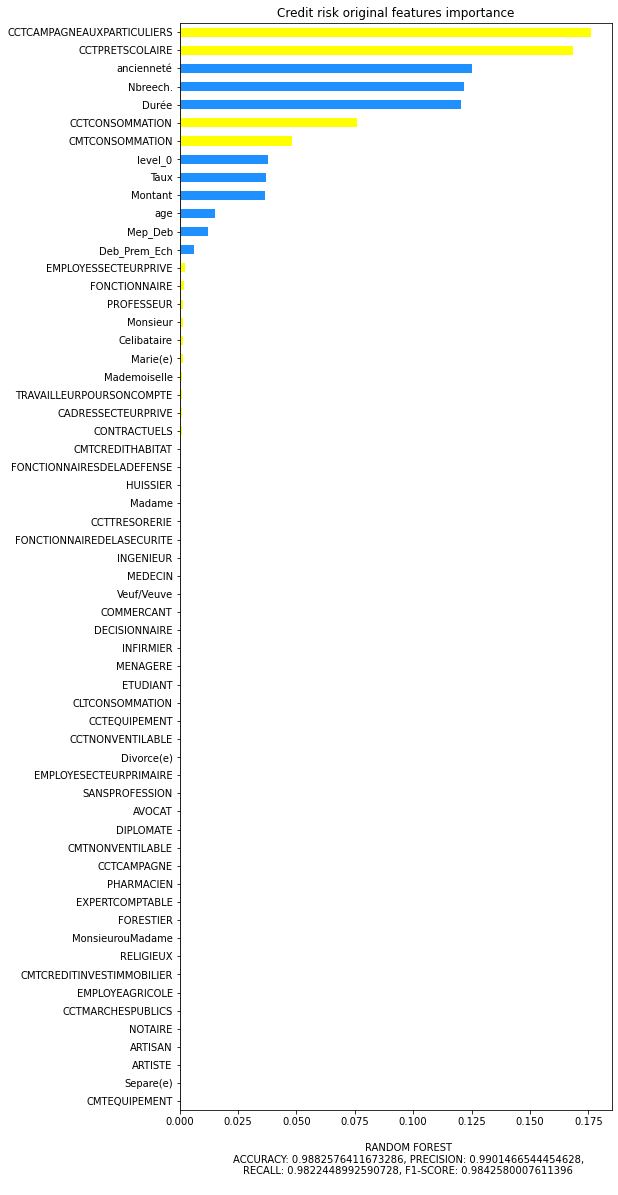

In [14]:
plot_features_importance_as_barh(
    pandas.read_csv("./data_selection_storage/2_rfc_original_2023_09_27_19_58_38.csv", sep='\t', encoding='utf-8',index_col=0),
    custom_color,
    modelD,
    "Credit risk original features importance",
    graph_a
    
)

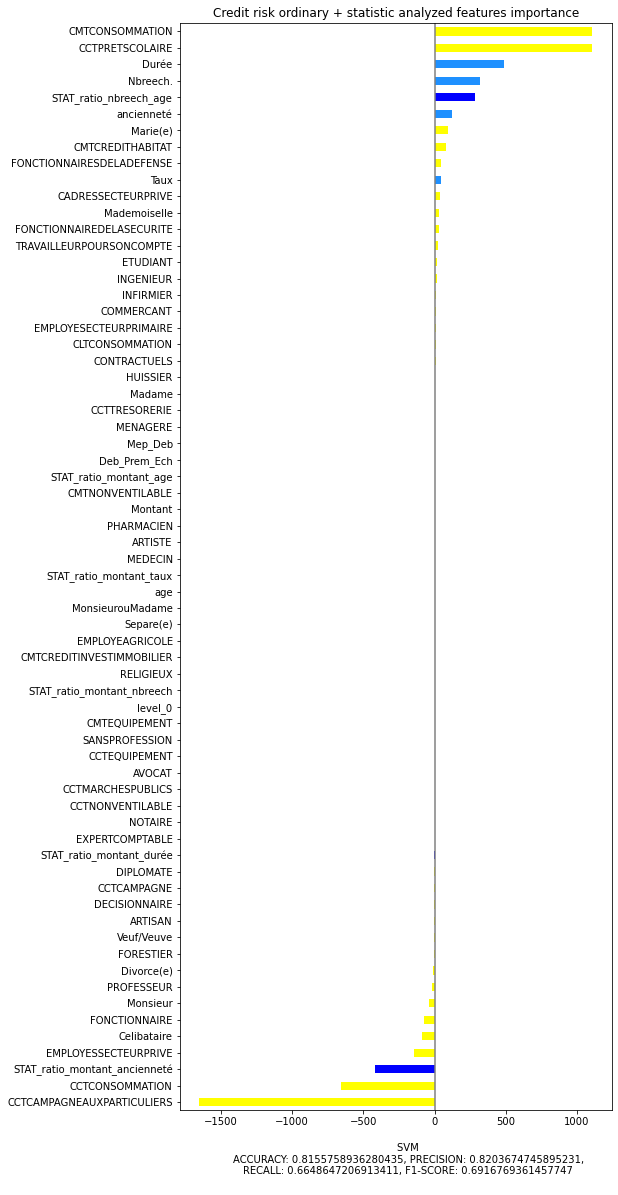

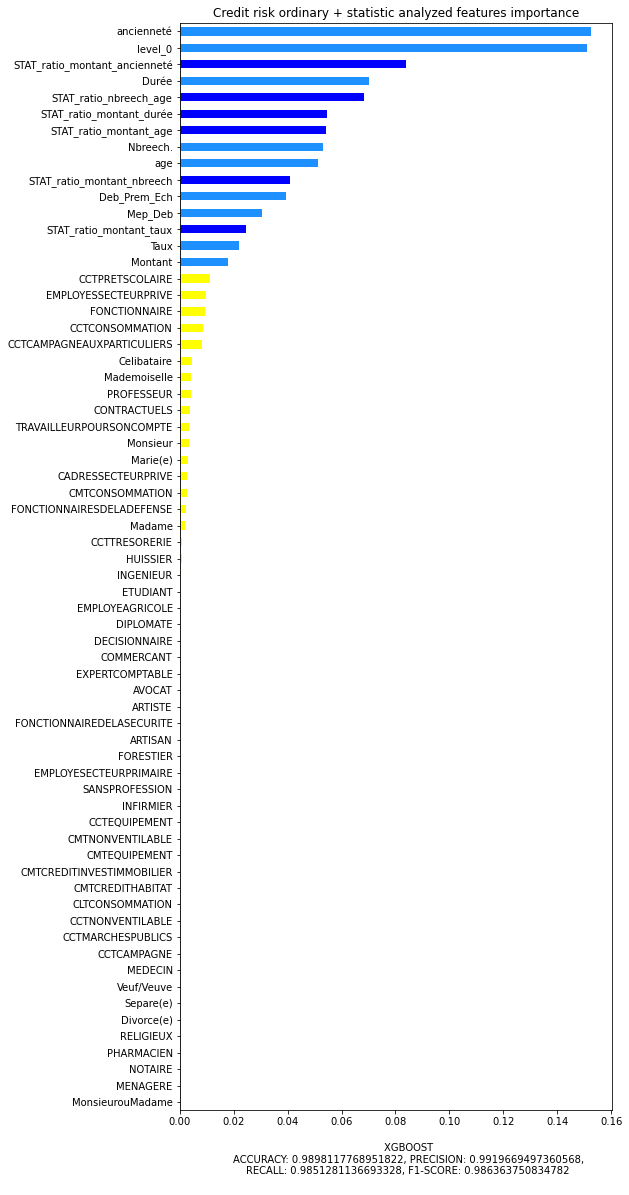

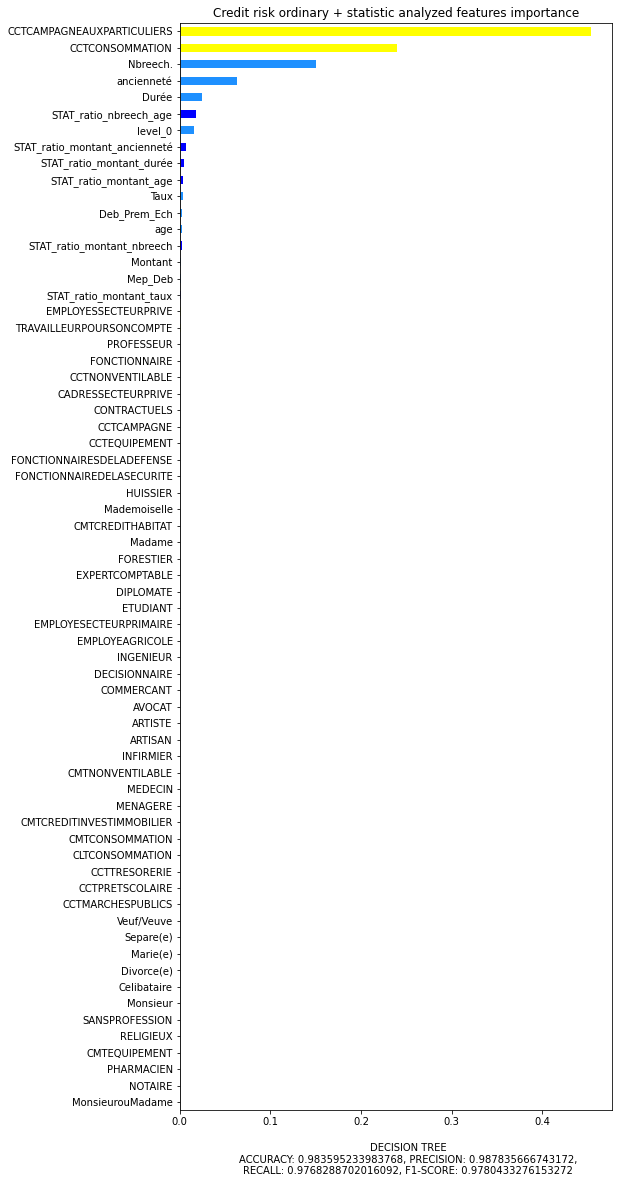

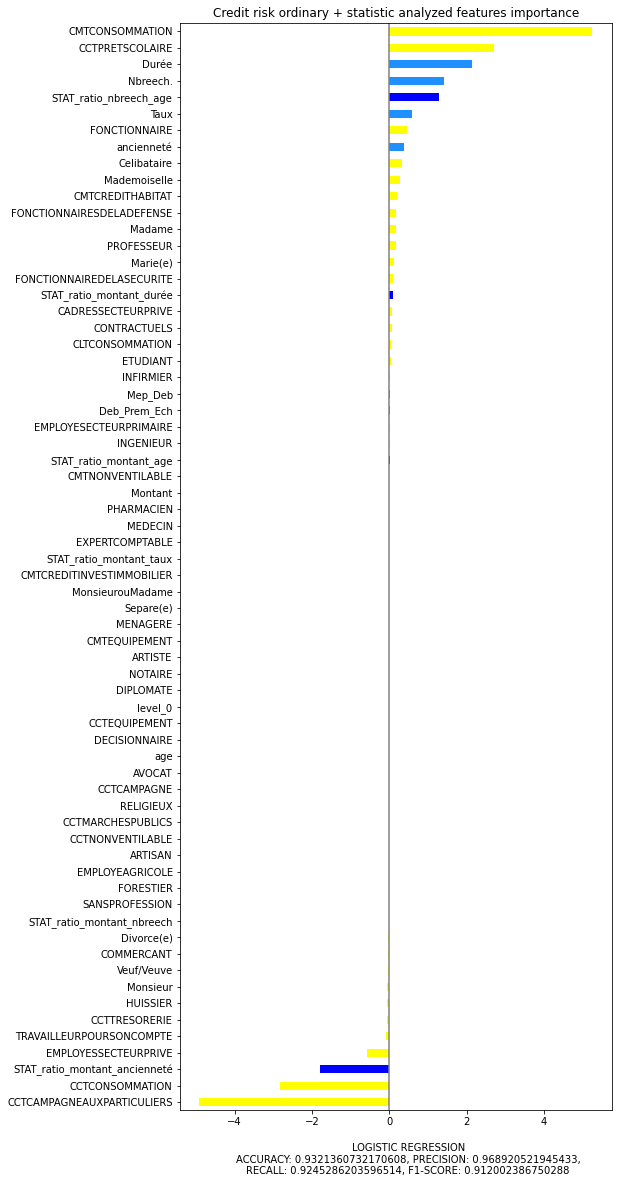

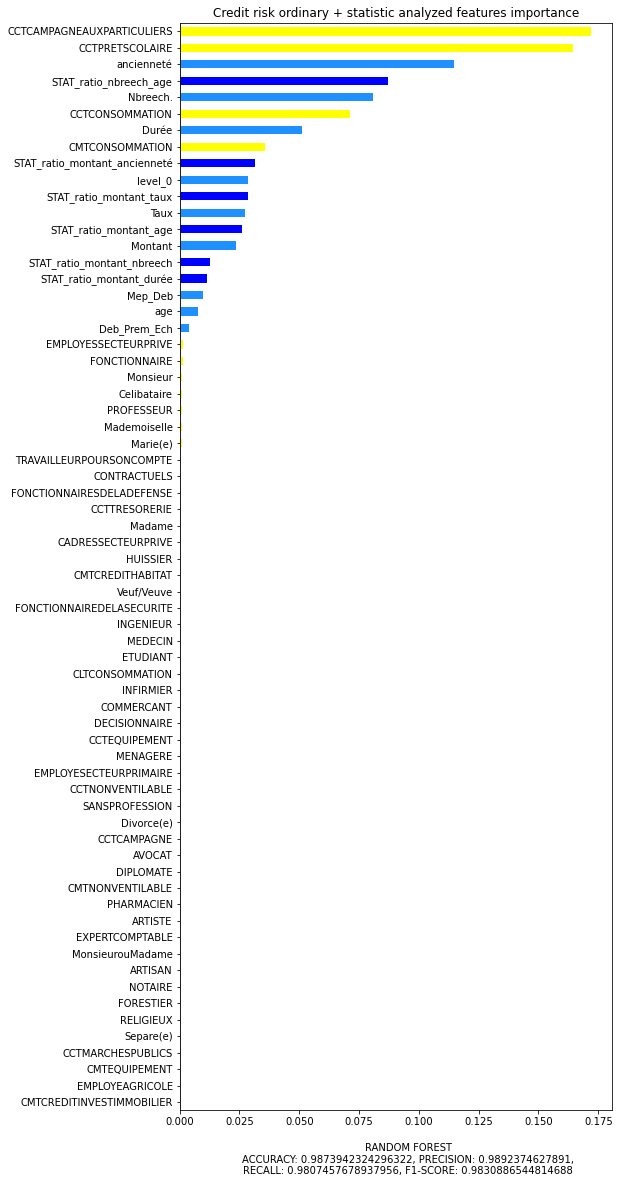

In [15]:
plot_features_importance_as_barh(
    pandas.read_csv("./data_selection_storage/2_rfc_original_statistic_2023_09_27_18_44_09.csv", sep='\t', encoding='utf-8',index_col=0),
    custom_color,
    modelD,
    "Credit risk ordinary + statistic analyzed features importance",
    graph_a
    
)

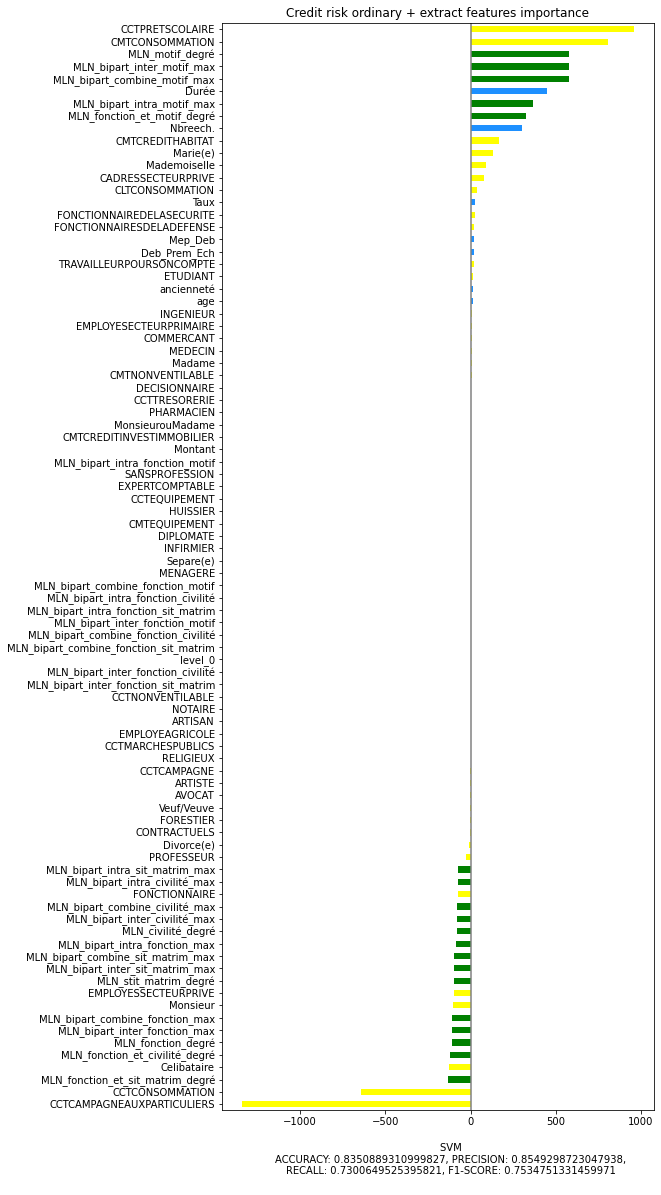

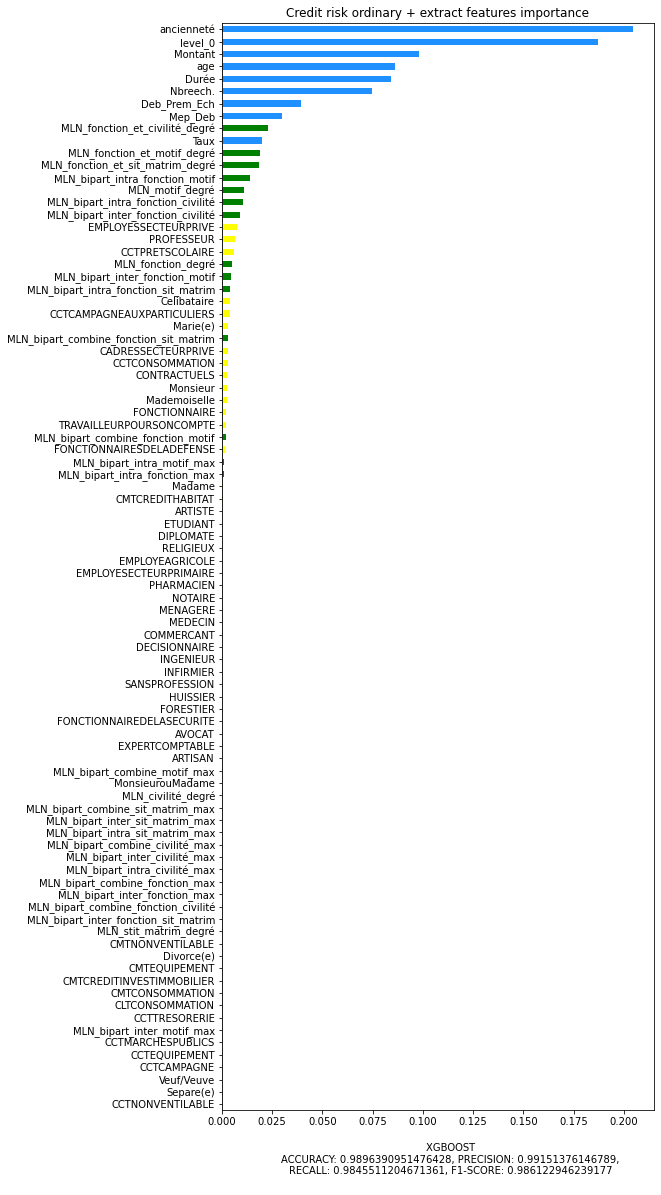

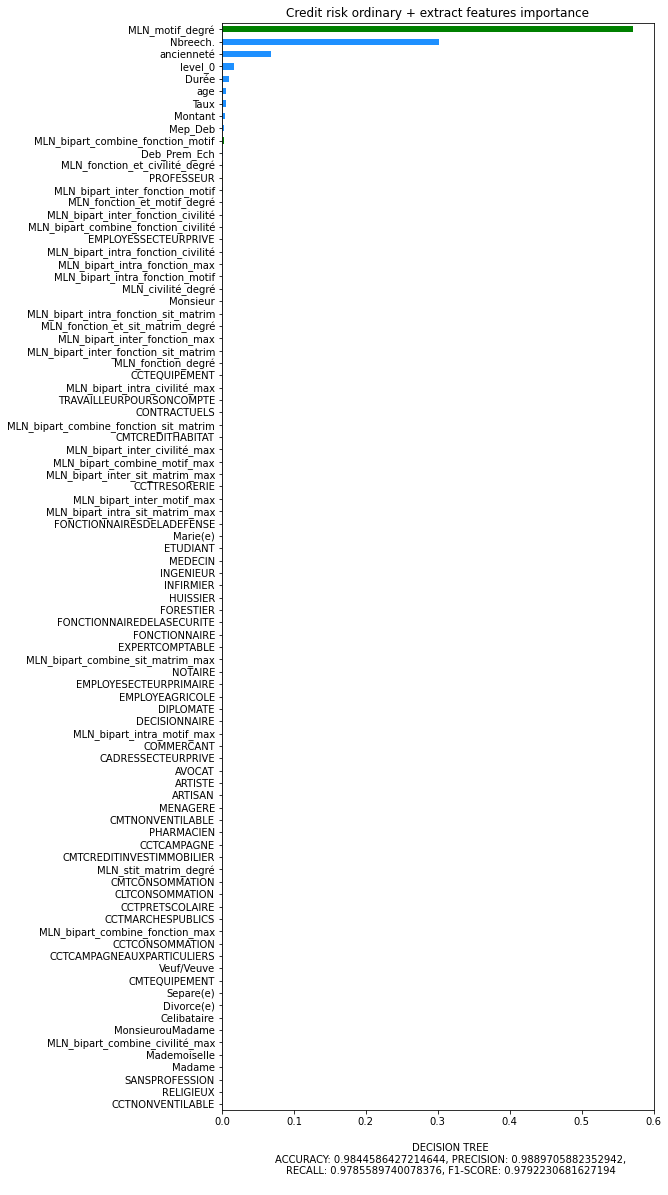

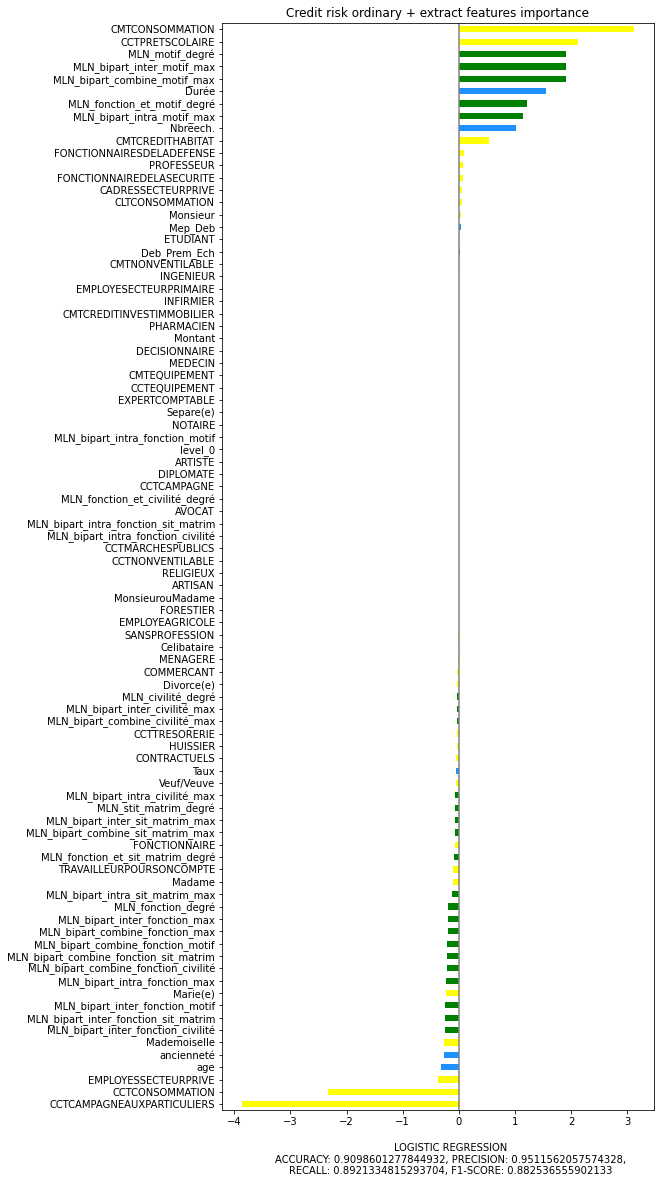

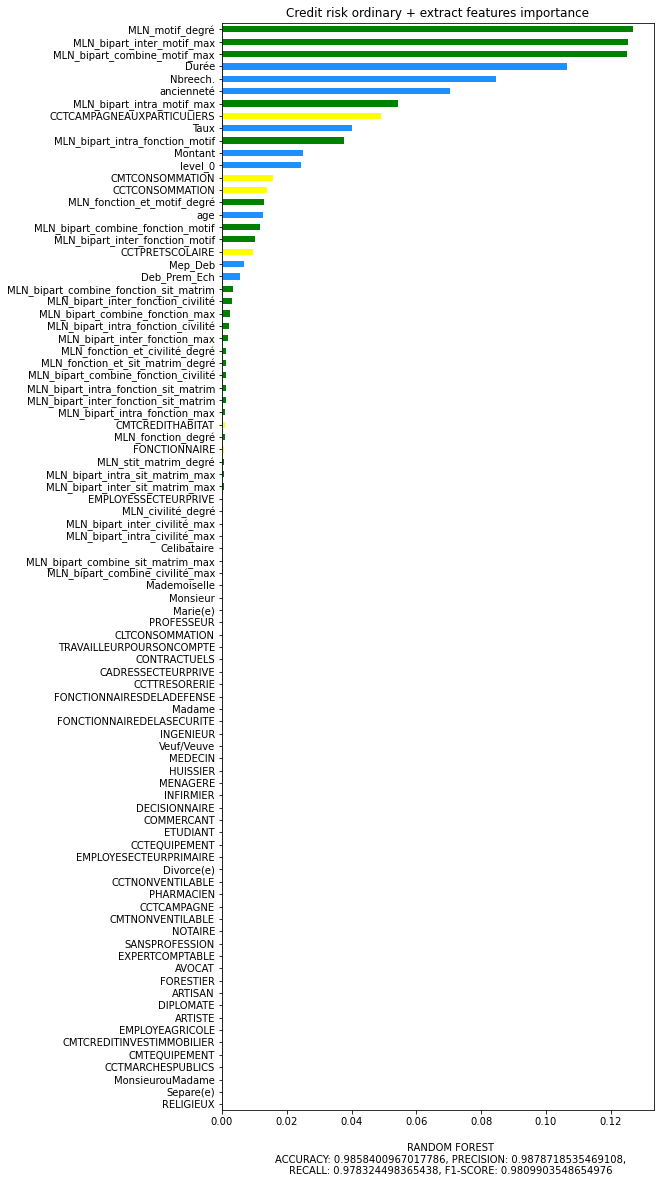

In [16]:
plot_features_importance_as_barh(
    pandas.read_csv("./data_selection_storage/2_rfc_original_extracted_2023_09_28_00_24_27.csv", sep='\t', encoding='utf-8',index_col=0),
    custom_color,
    modelD,
    "Credit risk ordinary + extract features importance",
    graph_a
    
)

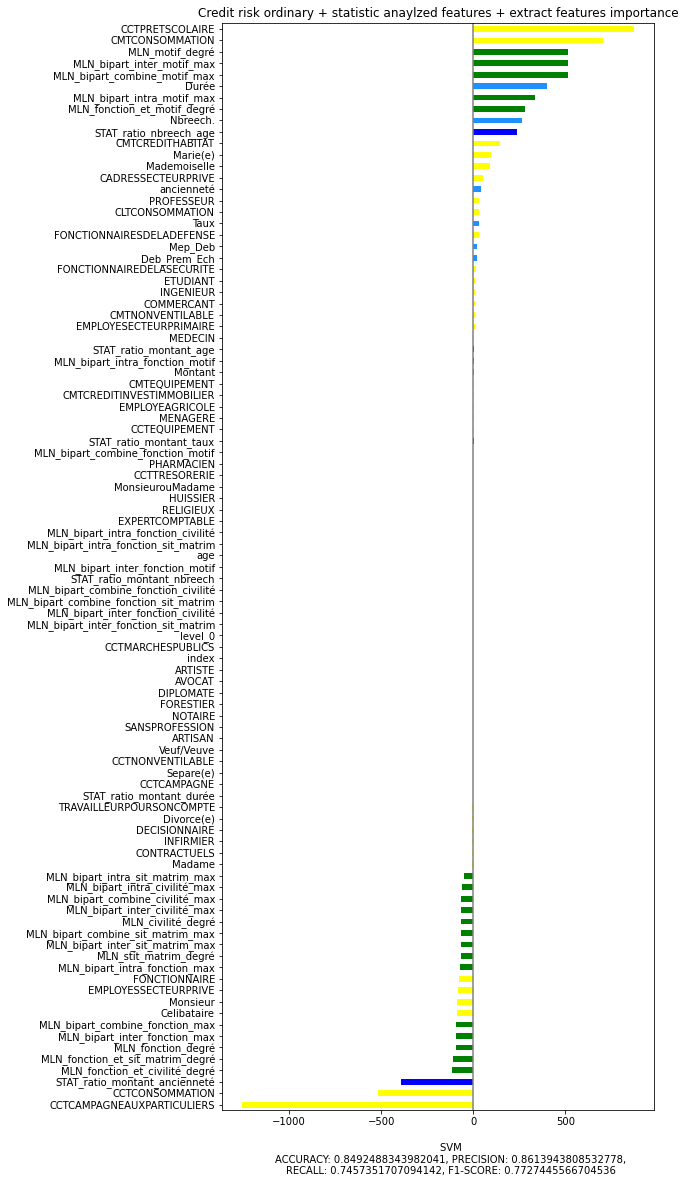

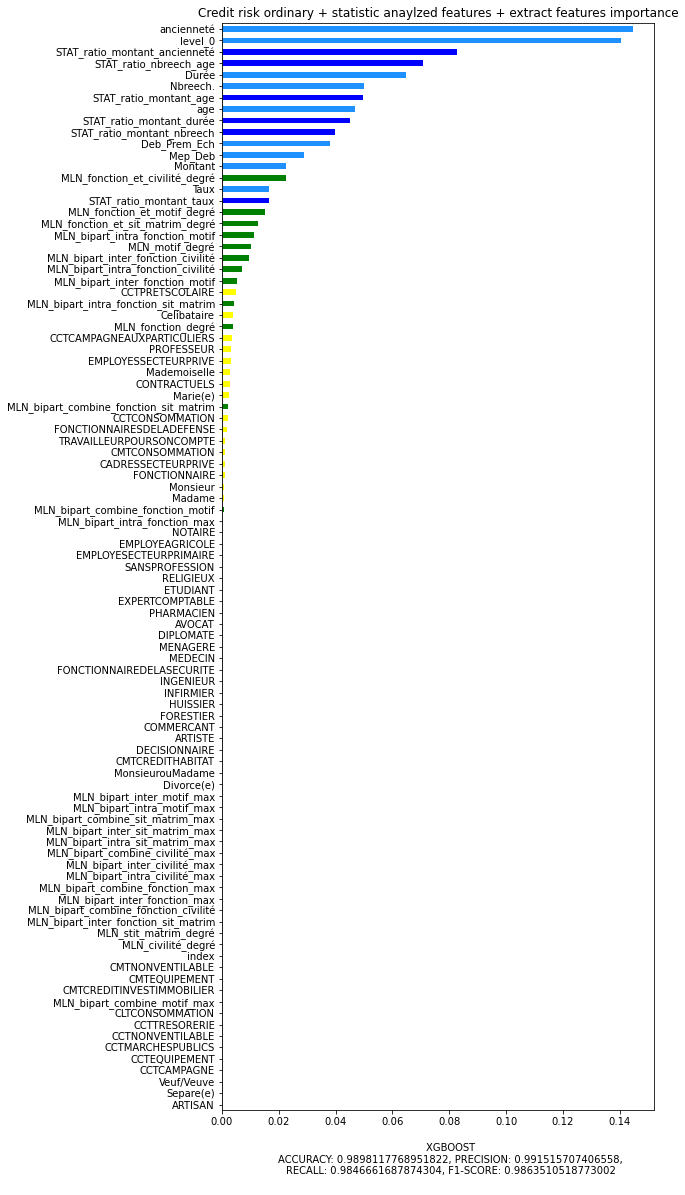

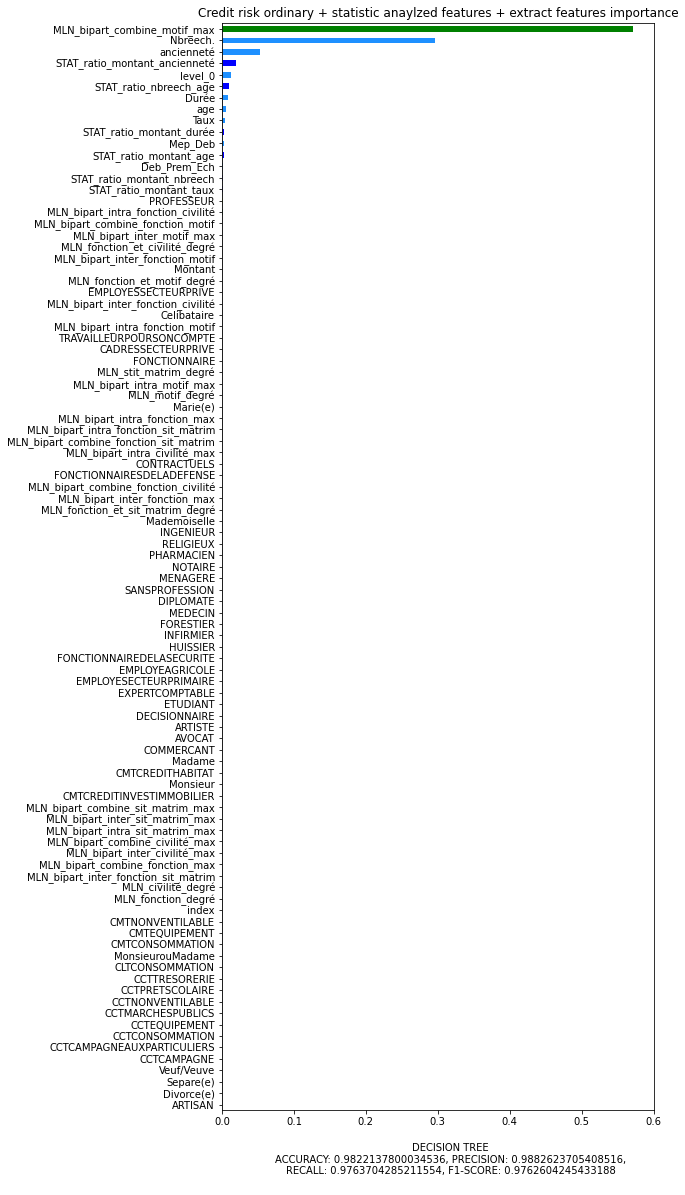

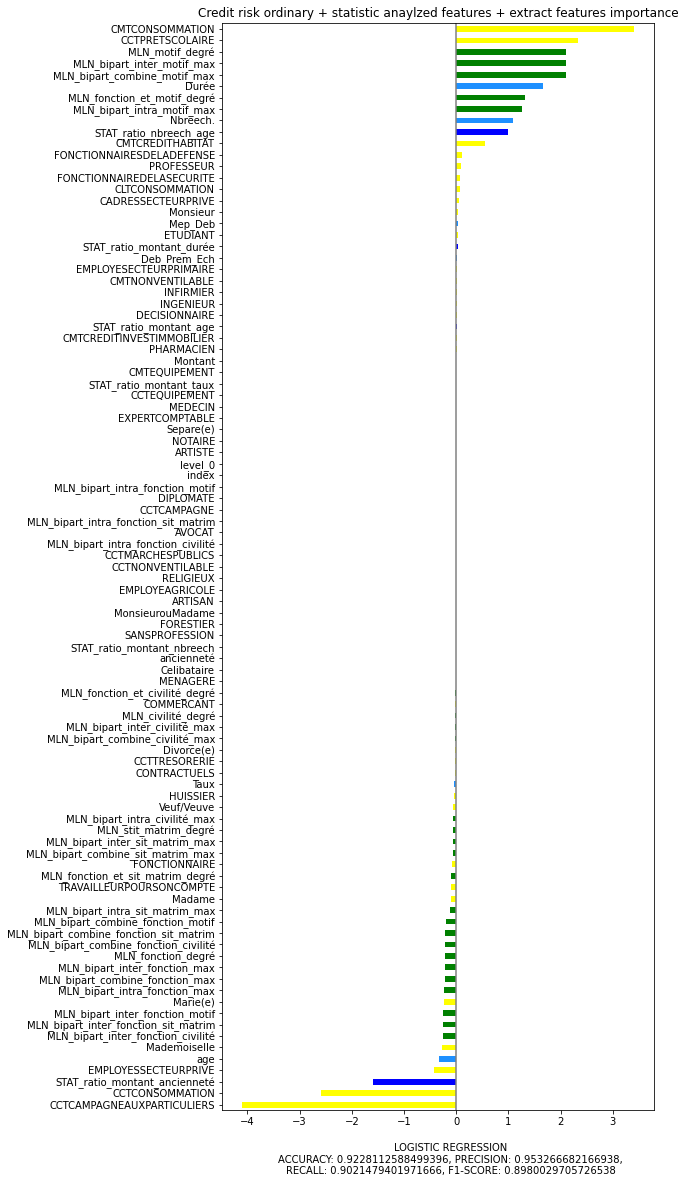

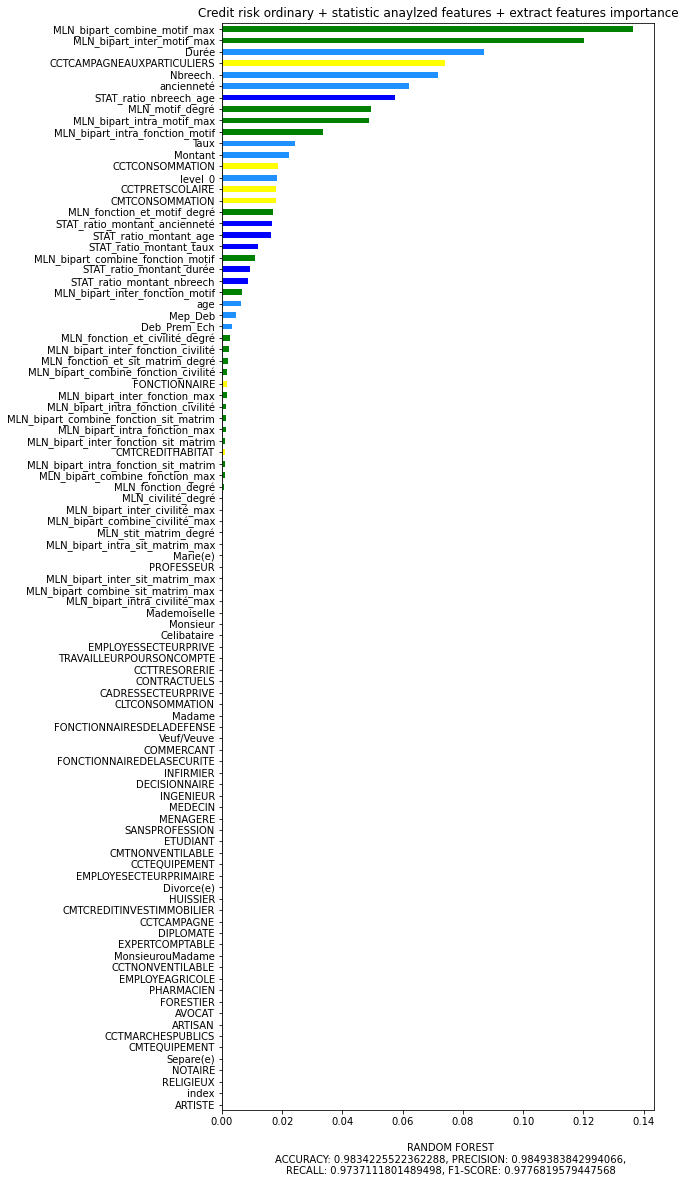

In [18]:
plot_features_importance_as_barh(
    pandas.read_csv("./data_selection_storage/2_rfc_original_statistic_extracted_2023_09_27_21_28_58.csv", sep='\t', encoding='utf-8',index_col=0),
    custom_color,
    modelD,
    "Credit risk ordinary + statistic anaylzed features + extract features importance",
    graph_a
    
)